<a href="https://colab.research.google.com/github/tech-tian26/FinClub/blob/main/FinClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**



In [63]:
import pandas as pd
df=pd.read_csv('train_dataset_final1.csv')

In [64]:
# Dropping Customer_ID column in original dataset
df.drop(columns=['Customer_ID'],inplace=True)

In [65]:
# No encoding of data is required as there is no categorical data

In [66]:
# Finding missing values
df.isnull().sum()

,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0
pay_5,0


In [67]:
# As 126 is very insignificant as compared to 30,000 samples, rows with missing values can be easily dropped
df = df[~df['age'].isnull()]  # Keeps rows where AGE is NOT null
df.head(11)

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63.0,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
5,1,1,1,80000,35.0,-1,2,-1,-1,-1,...,3294.93,0.03,3722.62,890.98,661.97,3294.84,1087.51,1946.50,0.83,0
6,1,0,2,200000,37.0,-1,-1,0,-1,-1,...,10712.01,19312.98,9455.13,15306.21,7055.30,10700.16,12388.83,15185.33,0.81,0
7,3,1,2,50000,24.0,0,0,0,0,0,...,5651.27,1600.15,6207.28,1464.87,2199.89,1000.26,3000.16,21055.33,0.12,0
8,1,1,3,50000,44.0,0,0,0,0,0,...,9001.04,1761.95,2311.19,2200.21,176.18,180.19,9769.14,35039.67,0.08,0
10,2,1,2,210000,34.0,1,-1,-1,-1,-1,...,0.59,1074.94,229.22,798.81,0.08,0.18,2246.98,350.50,2.07,1


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Check skewness
for col in numeric_cols:
    skew_value = df[col].skew()
    print(f"{col} → Skewness: {skew_value:.2f}")


marriage → Skewness: -0.03
sex → Skewness: -0.43
education → Skewness: 1.00
LIMIT_BAL → Skewness: 0.99
age → Skewness: 0.74
pay_0 → Skewness: 0.72
pay_2 → Skewness: 0.80
pay_3 → Skewness: 0.80
pay_4 → Skewness: 0.96
pay_5 → Skewness: 0.95
pay_6 → Skewness: 0.91
Bill_amt1 → Skewness: 2.67
Bill_amt2 → Skewness: 2.71
Bill_amt3 → Skewness: 3.15
Bill_amt4 → Skewness: 2.83
Bill_amt5 → Skewness: 2.90
Bill_amt6 → Skewness: 2.90
pay_amt1 → Skewness: 15.28
pay_amt2 → Skewness: 31.20
pay_amt3 → Skewness: 18.04
pay_amt4 → Skewness: 13.18
pay_amt5 → Skewness: 11.12
pay_amt6 → Skewness: 10.77
AVG_Bill_amt → Skewness: 2.74
PAY_TO_BILL_ratio → Skewness: -68.53
next_month_default → Skewness: 1.58


In [69]:
# for col in numeric_cols:
#     sns.histplot(df[col], kde=True)
#     plt.title(f"Distribution of {col}")
#     plt.show()

   marriage  sex  education   age  pay_0  pay_2  pay_3  pay_4  pay_5  pay_6  \
0         2    0          2  25.0      2      2      2      0      0      0   
1         2    1          1  24.0      0      0     -2     -2     -1      0   
2         1    0          2  63.0      0      0      0      0      0      0   
3         1    1          2  43.0      0      0      0      0      0      0   
4         2    0          1  32.0     -2     -2     -2     -2     -2     -2   

   ...  Bill_amt3  Bill_amt4  Bill_amt5  Bill_amt6  pay_amt1  pay_amt2  \
0  ...  10.941531  10.261267  10.007511   9.940380  7.601507  4.287093   
1  ...   3.292146   3.014398   7.901733   7.208822  4.485950  4.287093   
2  ...  10.820483  10.834665  10.857143  10.877906  7.643933  7.696663   
3  ...  11.414798  11.353889  11.294990  11.250865  8.116438  8.126196   
4  ...   8.066986  10.712938   7.650059   1.600875  6.908535  8.066920   

    pay_amt3  pay_amt4  pay_amt5  pay_amt6  
0   7.035137  7.508118  7.313907  7

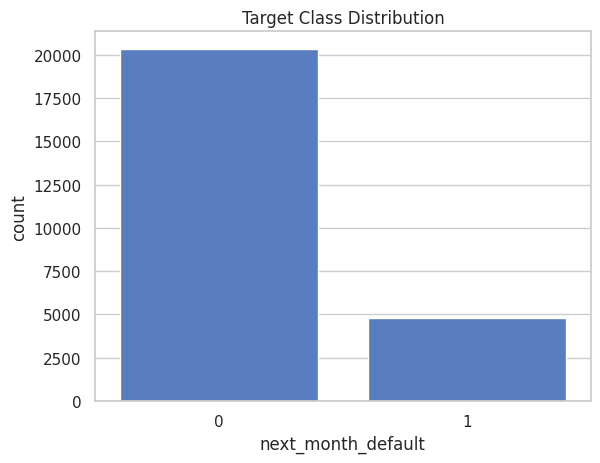

In [70]:
!pip install feature_engine
import numpy as np
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer

# Step 1: Identify numerical columns
num_cols1=['LIMIT_BAL','Bill_amt1','Bill_amt2','Bill_amt3','Bill_amt4','Bill_amt5','Bill_amt6','pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']

# Step 2: Log transform skewed features
for col in num_cols1:
    if (df[col] >= 0).all():  # log1p requires all positive
        df[col + '_log'] = np.log1p(df[col])
    else:
        # If some values are <0, skip log transform or shift
        print(f"Skipped log for: {col}")

# Replace original features with log-transformed (if created)
log_cols = [col for col in df.columns if '_log' in col]
df.drop(columns=[col.replace('_log', '') for col in log_cols], inplace=True)
df.rename(columns={col: col.replace('_log', '') for col in log_cols}, inplace=True)

#
# Step 3: Winsorization to cap outliers
winsor = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables=num_cols1
)
df = winsor.fit_transform(df)

# Step 5: Final Check
print(df.head())
print("\nSkewness After Log & Winsorization:")
print(df[num_cols1].skew())

# Optional: Check class distribution
sns.countplot(x='next_month_default', data=df)
plt.title("Target Class Distribution")
plt.show()

In [71]:
df.head(11)

,marriage,sex,education,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,...,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,2,0,2,25.0,2,2,2,0,0,0,...,10.941531,10.261267,10.007511,9.940380,7.601507,4.287093,7.035137,7.508118,7.313907,7.314047
1,2,1,1,24.0,0,0,-2,-2,-1,0,...,3.292146,3.014398,7.901733,7.208822,4.485950,4.287093,2.328345,7.901414,1.414626,7.208393
2,1,0,2,63.0,0,0,0,0,0,0,...,10.820483,10.834665,10.857143,10.877906,7.643933,7.696663,7.521134,7.601577,7.562162,7.601292
3,1,1,2,43.0,0,0,0,0,0,0,...,11.414798,11.353889,11.294990,11.250865,8.116438,8.126196,8.131957,7.895425,7.917536,7.970084
4,2,0,1,32.0,-2,-2,-2,-2,-2,-2,...,8.066986,10.712938,7.650059,1.600875,6.908535,8.066920,10.715057,7.650212,1.414626,0.239017
5,1,1,1,35.0,-1,2,-1,-1,-1,-1,...,8.222492,5.718014,6.495734,8.100444,4.485950,8.222452,6.793444,6.496730,8.100416,6.992565
6,1,0,2,37.0,-1,-1,0,-1,-1,0,...,9.163936,9.635441,8.860283,9.279214,9.868584,9.154418,9.636079,8.861676,9.278107,9.424631
7,3,1,2,24.0,0,0,0,0,0,0,...,10.187378,9.196974,8.591605,8.639813,7.378477,8.733639,7.290204,7.696617,6.909014,8.006754
8,1,1,3,44.0,0,0,0,0,0,0,...,10.797655,10.815658,9.084929,9.105206,7.474744,7.745950,7.696762,5.177166,5.199546,9.187086
10,2,1,2,34.0,1,-1,-1,-1,-1,-2,...,5.436948,6.684137,2.458506,1.600875,6.980950,5.439035,6.684374,1.821627,1.414626,7.717787


# **Explorartory Data Analysis**

 Univariate Analysis: Numerical Features


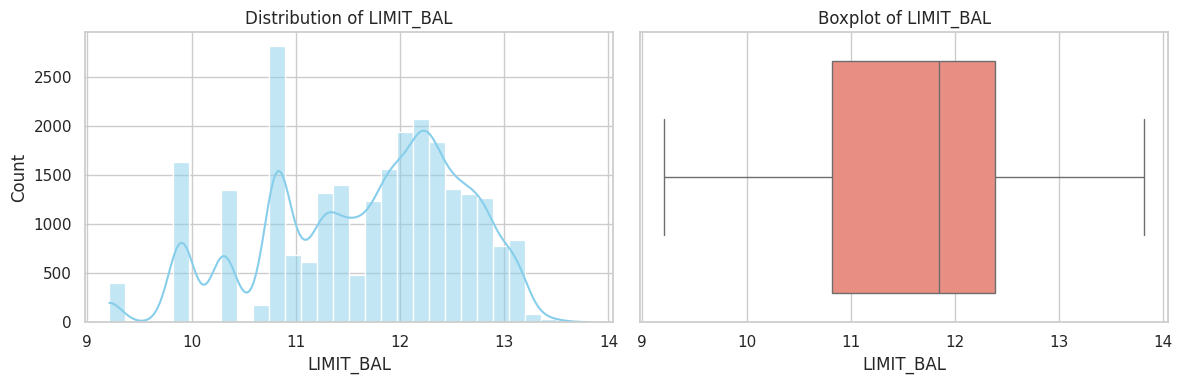

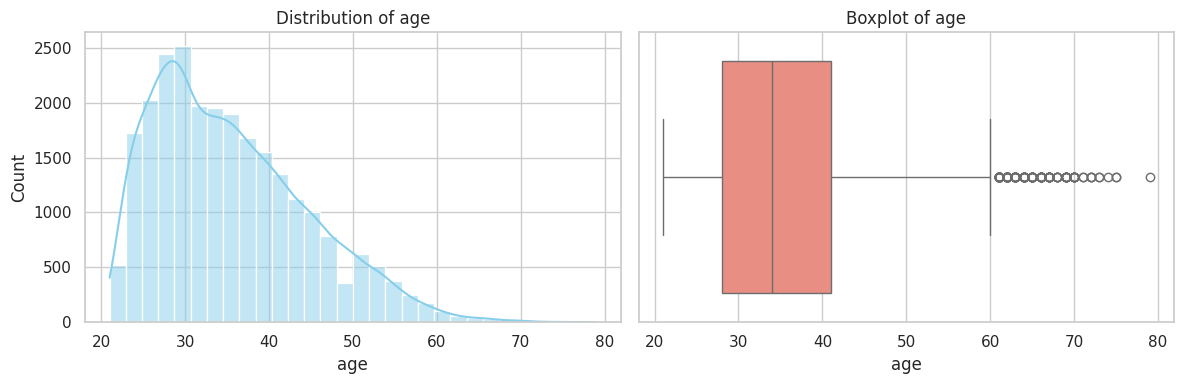

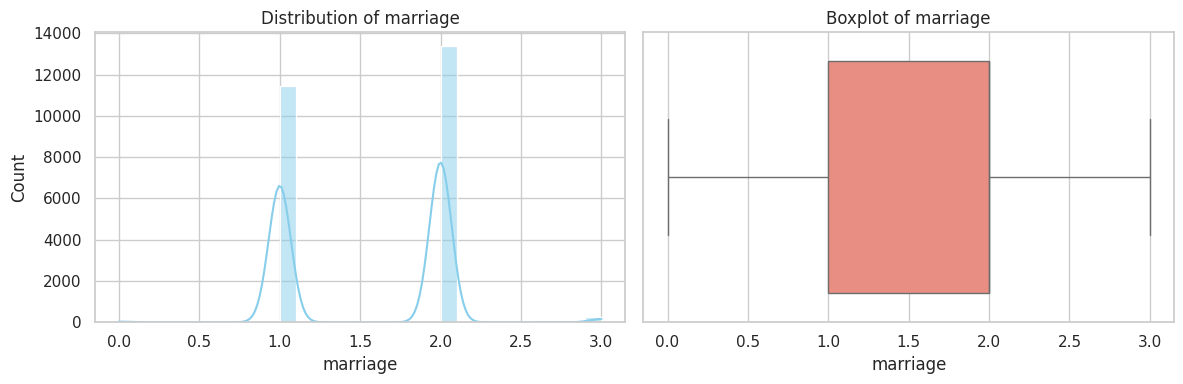

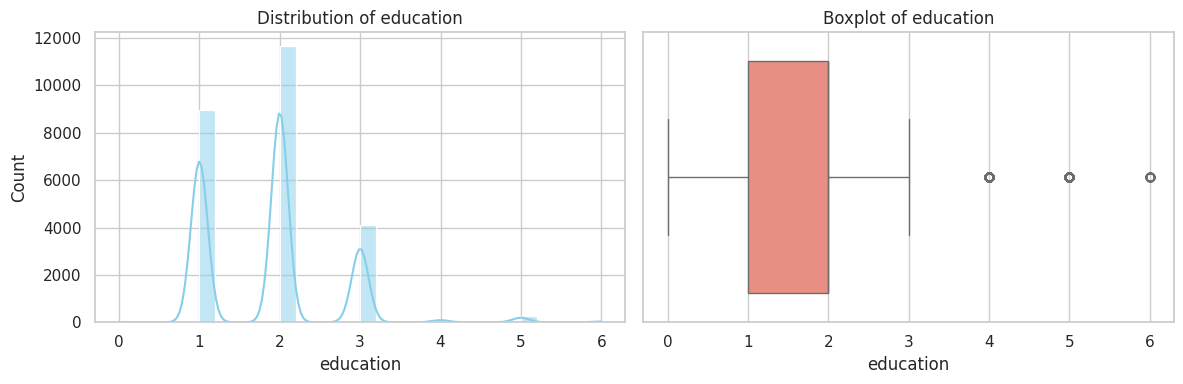

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid', palette='muted')


# Numerical Features: Histograms + Boxplots
X_1=['LIMIT_BAL','age','marriage','education']
print(" Univariate Analysis: Numerical Features")
for col in X_1:
    plt.figure(figsize=(12, 4))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


The univariate analysis of numerical features such as credit limit, age, and marital status indicates that most credit card users have mid-range credit limits, with an interquartile range (IQR) between 110,000 and 125,000. Additionally, the majority of users are aged between 25 and 40 years, reflecting a concentration among young to middle-aged adults. Older users exist but are outliers and fewer in number.Education level is strongly skewed toward higher education, with the vast majority of individuals being university or graduate school educated.This insight can be vital for credit risk modeling, targeted marketing strategies, and user segmentation.

*LIMIT_BAL and age are numerically well-distributed with minimal outliers, ideal for modeling.

*Categorical features like sex and marriage are well-behaved and can be directly used for classification or clustering models.

<ipython-input-73-7d78bcac124a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
<ipython-input-73-7d78bcac124a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
<ipython-input-73-7d78bcac124a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
<ipython-input-73-7d78bcac124a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=F

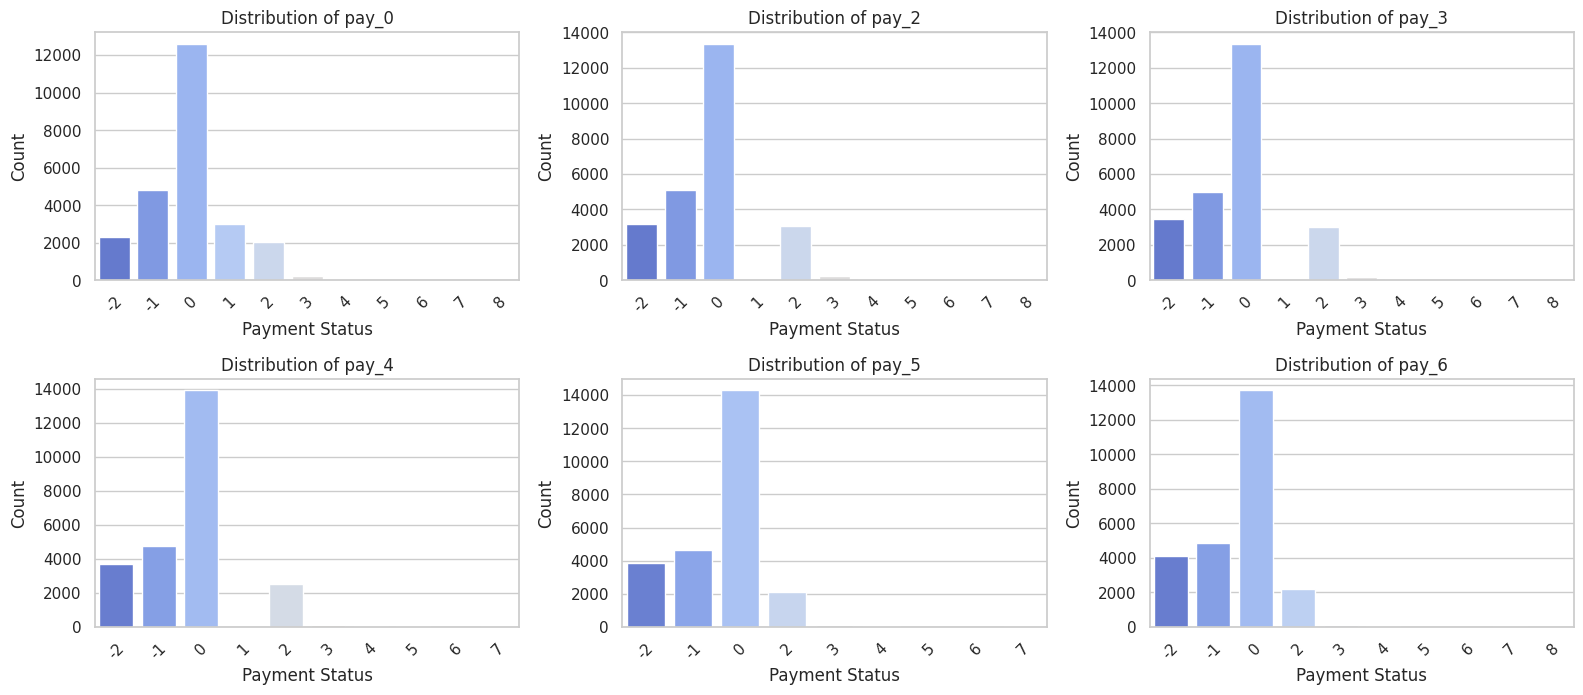

In [73]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

plt.figure(figsize=(16, 10))
for i, col in enumerate(pay_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, palette='coolwarm')
    plt.title(f'Distribution of {col}')
    plt.xlabel("Payment Status")
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The analysis of payment behavior shows that most credit card holders are punctual or early payers, with delayed payments being relatively rare. However, the observed class imbalance in payment statuses is significant and must be addressed during model building. Without proper handling, such imbalance can lead to biased predictive models that underperform in identifying high-risk (late-paying) customers, which is crucial in a credit risk assessment task.




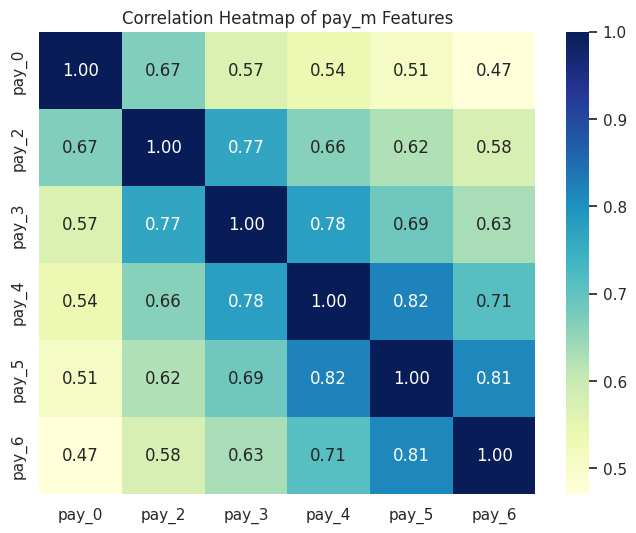

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[pay_cols].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap of pay_m Features")
plt.show()


The payment status of people in different months is very similar. This means if someone pays late in one month, they may also pay late in other months. This pattern helps us guess who might not pay in the future.

But since these months are so similar, all the correlation values are above 0.5 — this is called multicollinearity. When features are too similar, it can confuse the model. So, we should use methods like PCA (Principal Component Analysis) to reduce extra or repeated information. This will help make our model simpler and more accurate.

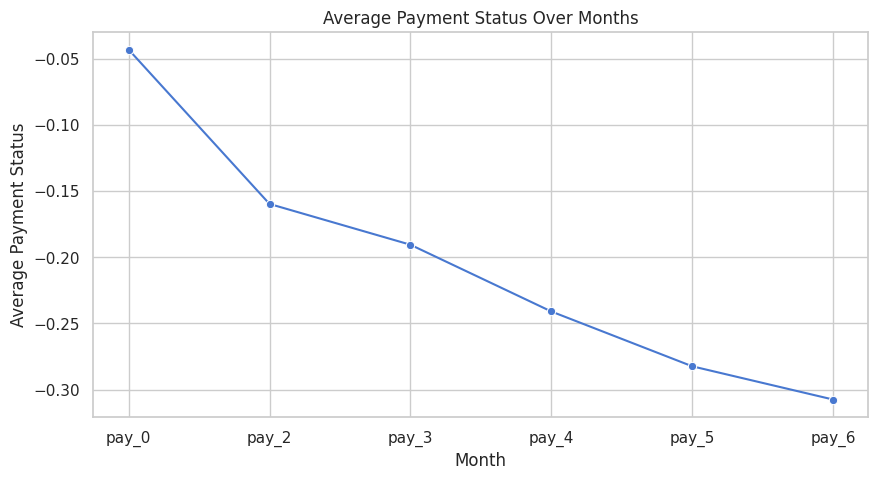

In [75]:
avg_payment_status = df[pay_cols].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=pay_cols, y=avg_payment_status, marker='o')
plt.title("Average Payment Status Over Months")
plt.xlabel("Month")
plt.ylabel("Average Payment Status")
plt.grid(True)
plt.show()


This line chart shows how the average payment status of customers changes from month to month. The values are going down, which means that more people are paying late as time goes on. In the beginning (pay_0), most people were paying on time or only a little late. But by the sixth month (pay_6), the average delay in payment has increased a lot.

This tells us that customers tend to get worse at paying on time over time, which is important information when trying to predict if someone will default (not pay at all).

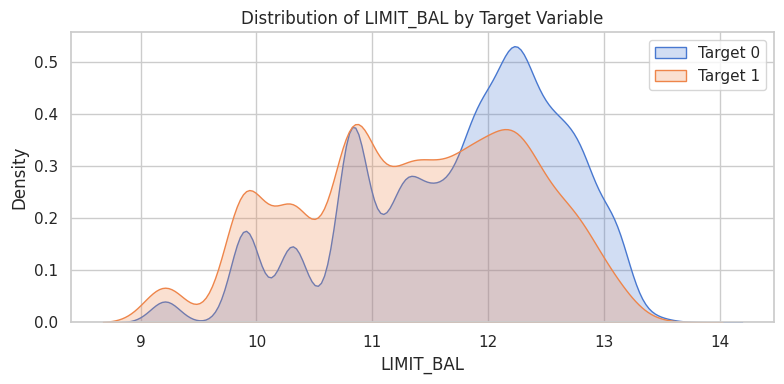

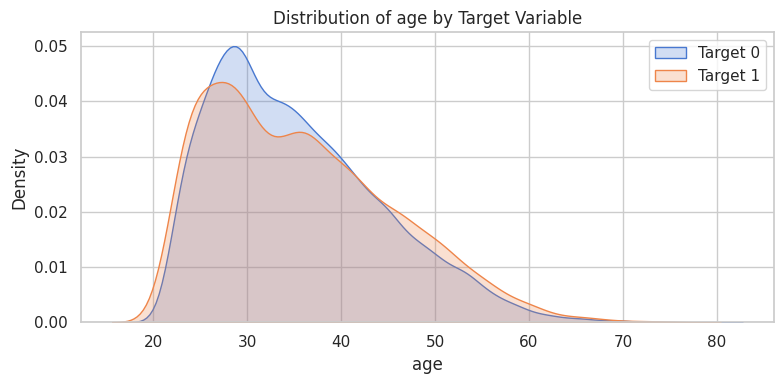

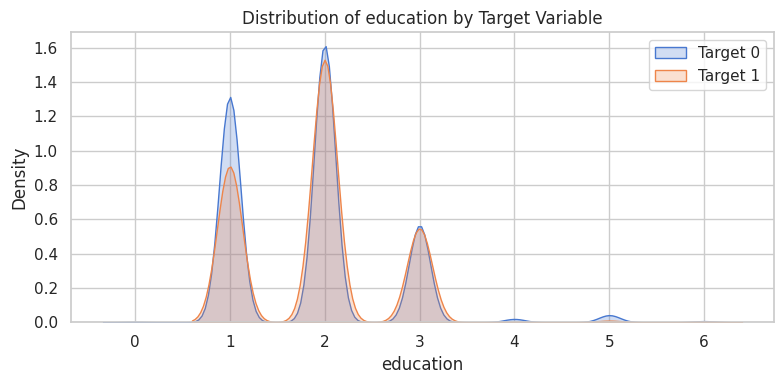

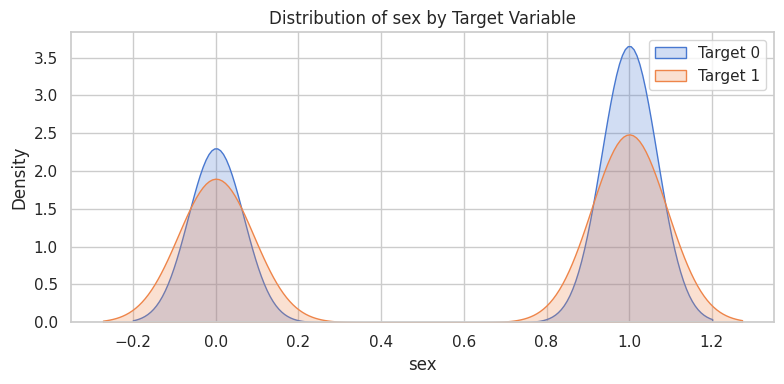

In [76]:
features = ['LIMIT_BAL', 'age','education','sex']

for col in features:
    plt.figure(figsize=(8, 4))
    for label in [0, 1]:
        sns.kdeplot(df[df['next_month_default'] == label][col], label=f'Target {label}', fill=True, common_norm=False)
    plt.title(f'Distribution of {col} by Target Variable')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()



Credit Limit (LIMIT_BAL)
Inference: Individuals who did not default on their payments (Target = 0) generally had higher credit limits. The distribution for non-defaulters is noticeably shifted toward higher credit values.

Conclusion: A higher credit limit is strongly associated with a lower probability of default. This makes LIMIT_BAL a highly significant and informative feature for default prediction.

Age
Inference: Younger individuals, particularly those in the 25–35 age range, show a slightly higher tendency to default. This is reflected in the greater density of the defaulter curve within this age segment.

Conclusion: Age plays a moderate role in influencing default behavior, with younger individuals being relatively more prone to default. Therefore, age can be considered a moderately useful feature.

Education
Inference: Most individuals are concentrated in education categories 1, 2, and 3, with the distribution between defaulters and non-defaulters remaining largely similar across these levels.

Conclusion: Education level does not present a significant difference between the two target classes. As a result, it may not be a strong predictor of default risk.

Gender (Sex)
Inference: The distributions of male and female individuals across default and non-default classes are nearly overlapping, with minimal observable differences.

Conclusion: Gender appears to have little to no impact on predicting credit default. It is likely a weak or neutral feature in the modeling process.

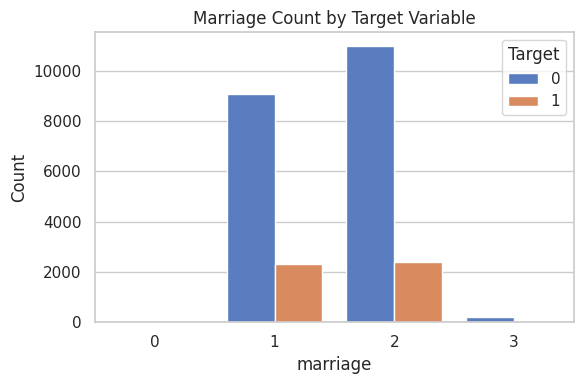

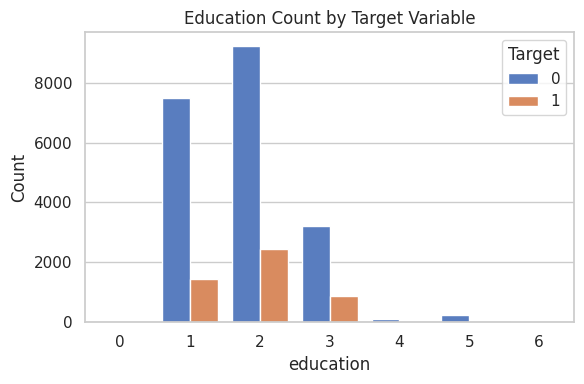

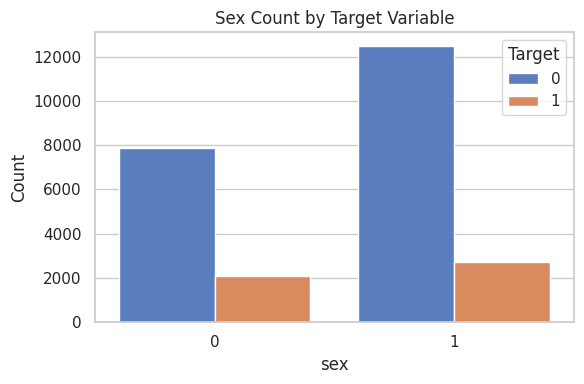

In [77]:
cat_features = ['marriage', 'education', 'sex']

for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue=df['next_month_default'])
    plt.title(f'{col.capitalize()} Count by Target Variable')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Target')
    plt.tight_layout()
    plt.show()



Marriage
Inference:
Most individuals are either married (2) or single (1). The count of non-defaulters (Target 0) is significantly higher in both categories. Defaulters (Target 1) are relatively fewer across all marital statuses, and there’s very little representation in the “others” (3) category.

Conclusion:
Marital status shows some variation across default classes but does not significantly differentiate defaulters from non-defaulters. Hence, it may have limited predictive power and could be considered a weak or secondary feature.

Education
Inference:
Most individuals fall into education levels 1, 2, and 3. While defaulters exist in all major categories, the distribution of defaulters and non-defaulters is quite similar, with non-defaulters dominating overall.

Conclusion:
Education level does not show a strong influence on default behavior. The similar distribution across targets indicates it may not be a useful standalone predictor.

Gender (Sex)
Inference:
There is a noticeable gender imbalance with more males than females. However, within both genders, non-defaulters are the majority. The distribution between Target 0 and Target 1 remains quite similar for both sexes.

Conclusion:
Gender does not significantly impact default prediction. It shows negligible discriminative power and may be considered a non-informative feature in this context.



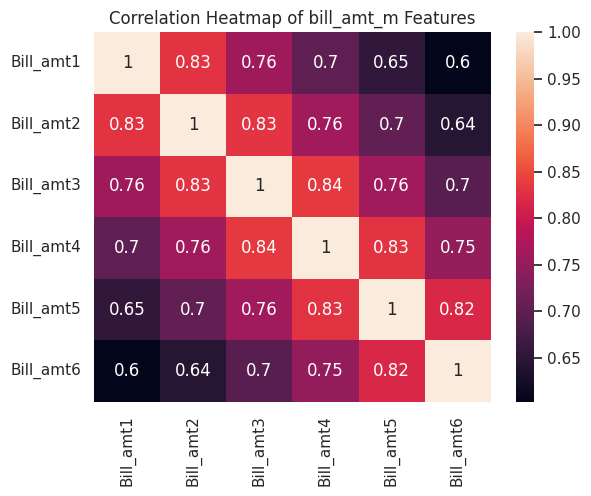

In [78]:
Bill_cols=['Bill_amt1','Bill_amt2','Bill_amt3','Bill_amt4','Bill_amt5','Bill_amt6']
sns.heatmap(df[Bill_cols].corr(), annot=True)
plt.title("Correlation Heatmap of bill_amt_m Features")
plt.show()

<Axes: ylabel='next_month_default'>

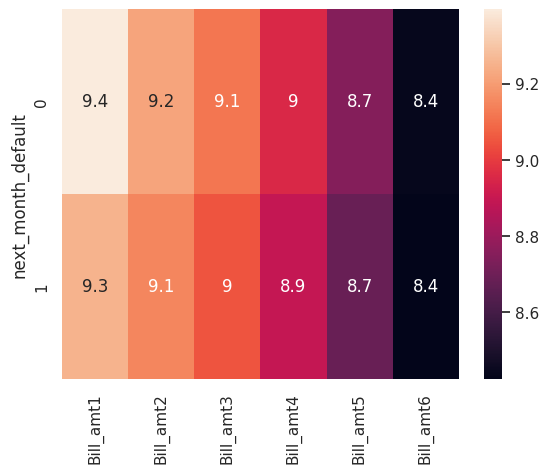

In [79]:
sns.heatmap(df.groupby('next_month_default')[Bill_cols].mean(), annot=True)

Inference:
The distribution for defaulters is concentrated at lower bill amounts, while non-defaulters have a broader spread.
There is a clear separation in density, especially at the lower end of the bill amount spectrum.

Conclusion:
Customers with lower historical bill amounts are more likely to default.
Bill amount distributions can be a useful feature in predicting credit default risk.

<Axes: >

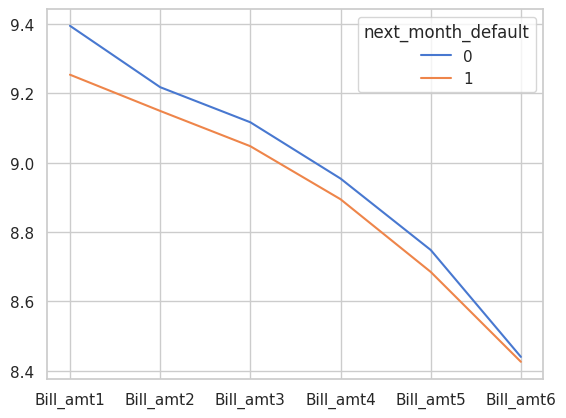

In [80]:
df.groupby('next_month_default')[Bill_cols].mean().T.plot()

Inference:
Non-defaulters consistently have higher average bill amounts over six months compared to defaulters.
Defaulters show a sharper decline in bill amounts, indicating reduced credit usage before default.

Conclusion:
Higher average bill amounts over time may be indicative of stronger financial activity and lower default risk.
Monitoring bill amount trends can help identify early warning signs of potential defaults.

Inference 1: The bill amount features (Bill_amt1 to Bill_amt6) are strongly correlated with each other, indicating high redundancy.
Conclusion 1: Due to their similarity, dimensionality reduction or selection may be needed to avoid multicollinearity in modeling.

Inference 2: Non-defaulters (Target 0) consistently show higher average bill amounts across all six months compared to defaulters.
Conclusion 2: Lower bill amounts may indicate potential default risk, making these features useful for prediction.

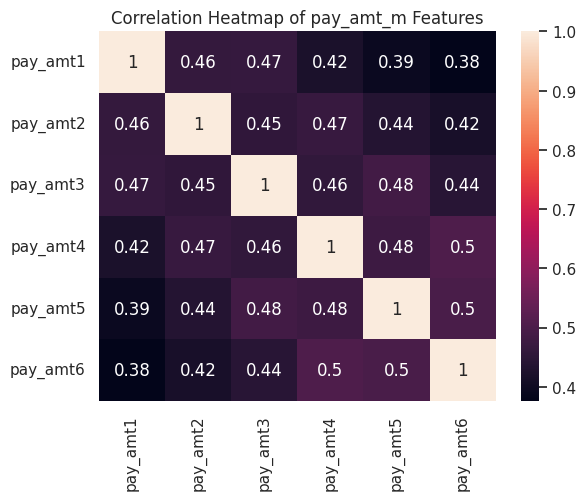

In [81]:
pay_cols=['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']
sns.heatmap(df[pay_cols].corr(), annot=True)
plt.title("Correlation Heatmap of pay_amt_m Features")
plt.show()

Inference:
The heatmap shows generally low to moderate positive correlations among the monthly payment amount features (pay_amt1 to pay_amt6), with the highest correlation being around 0.30. This indicates that while there is some consistency in how customers make payments across months, the relationship is not particularly strong.


Conclusion:
The moderate correlations between monthly payment amounts suggest that customer payment behavior varies from month to month, though some consistency exists. These patterns may help in identifying customers with irregular payment behavior, which could be a useful feature in credit risk modeling



<Axes: >

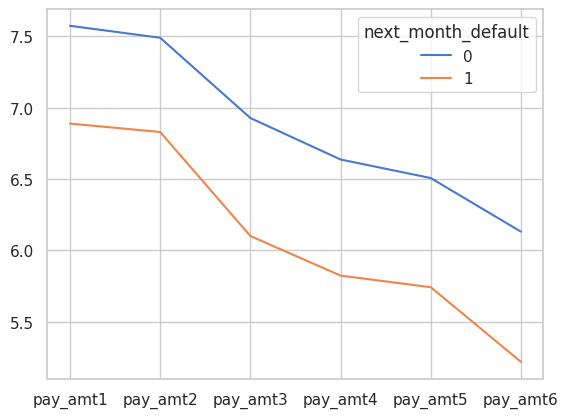

In [82]:
df.groupby('next_month_default')[pay_cols].mean().T.plot()

Inference:
Customers who defaulted (label 1) had consistently lower average bill amounts compared to non-defaulters (label 0).
Both groups show a declining trend in bill amounts from Bill_amt1 to Bill_amt6, with a wider gap over time.

Conclusion:
Lower and declining bill amounts may serve as early indicators of financial distress.
Tracking historical billing trends can help in pre-emptive identification of high-risk customers.



# **Feature Engineering + Behaviour analysis**

In [83]:
X=df.drop(columns=['next_month_default'])
y=df['next_month_default']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

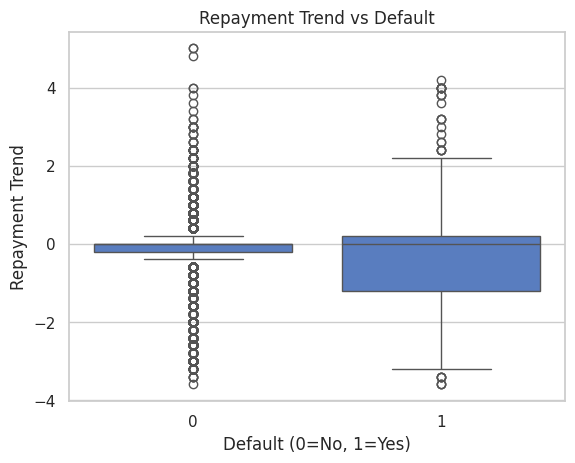

In [85]:
X_train['repayment_trend'] = X_train[['pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].mean(axis=1) - X_train['pay_0']
X_train_plot = X_train.copy()
X_train_plot['next_month_default'] = y_train
sns.boxplot(x='next_month_default', y='repayment_trend', data=X_train_plot)
plt.title('Repayment Trend vs Default')
plt.xlabel('Default (0=No, 1=Yes)')
plt.ylabel('Repayment Trend')
plt.show()

In [86]:
X_train['repayment_trend'].describe()

,repayment_trend
count,17584.000000
mean,-0.195985
std,0.908526
min,-3.600000
25%,-0.200000
50%,0.000000
75%,0.000000
max,5.000000


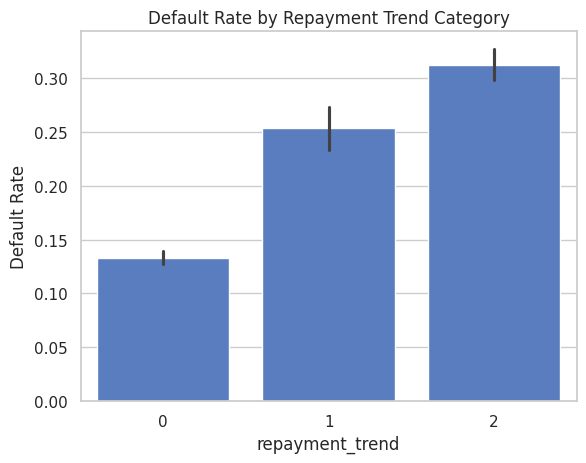

In [87]:
def trend_category(x):
    if x < -0.2:
        return 2  #'Improving'
    elif x > 0.5:
        return 1  #'Worsening'
    else:
        return 0  #'Stable'

X_train['repayment_trend'] = X_train['repayment_trend'].apply(trend_category)
X_train_plot['repayment_trend'] = X_train_plot['repayment_trend'].apply(trend_category)

sns.barplot(x='repayment_trend', y='next_month_default', data=X_train_plot, estimator=np.mean)
plt.title('Default Rate by Repayment Trend Category')
plt.ylabel('Default Rate')
plt.show()

We engineered a feature named ***repayment_trend*** to quantify the customer’s repayment behavior over time by comparing historical average repayment delays with the most recent repayment status.

The box plot shows:
*   .Customers who did not default (0) generally have positive or near-zero
  repayment trends, indicating stable or improving repayment behavior.
*   Customers who defaulted (1) tend to have lower or negative repayment trends,meaning their repayment behavior worsened over time.

The bar plot shows strong correlation between worsening repayment trend and higher likelihood of default.

In [88]:
def back_to_back_delinquency(row):
    pattern = ''.join(['1' if x > 0 else '0' for x in row])
    return pattern.count('11')  # Count consecutive late months

X_train['back_to_back_delinquency'] = X_train[pay_cols].apply(back_to_back_delinquency, axis=1)
X_train_plot['back_to_back_delinquency'] = X_train_plot[pay_cols].apply(back_to_back_delinquency, axis=1)

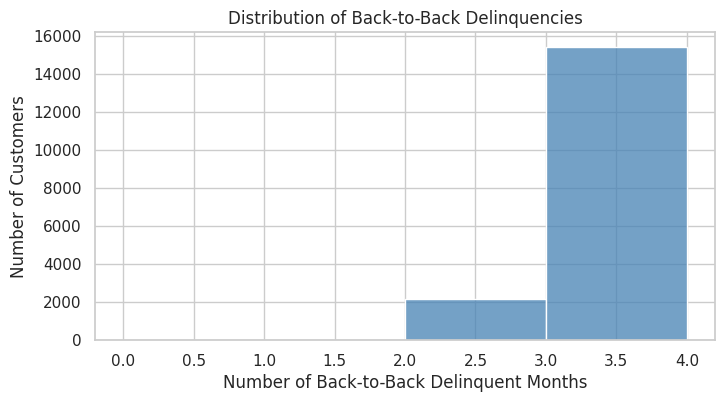

In [89]:
plt.figure(figsize=(8, 4))
sns.histplot(X_train['back_to_back_delinquency'], bins=range(0, X_train['back_to_back_delinquency'].max() + 2), kde=False, color='steelblue')
plt.title('Distribution of Back-to-Back Delinquencies')
plt.xlabel('Number of Back-to-Back Delinquent Months')
plt.ylabel('Number of Customers')
plt.show()

<ipython-input-90-a39bc8d76f41>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


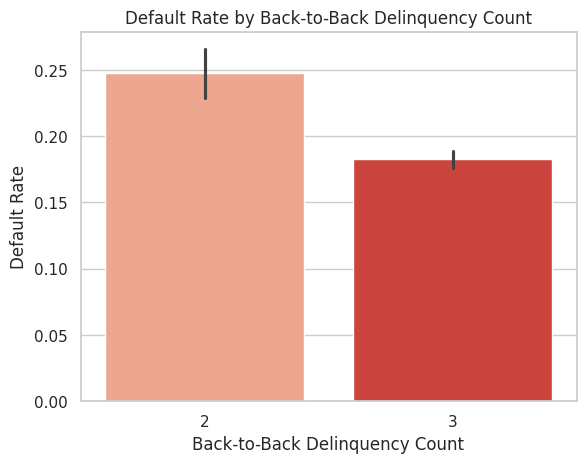

In [90]:
sns.barplot(
    x='back_to_back_delinquency',
    y='next_month_default',
    data=X_train_plot,
    estimator=np.mean,
    palette='Reds'
)
plt.title('Default Rate by Back-to-Back Delinquency Count')
plt.xlabel('Back-to-Back Delinquency Count')
plt.ylabel('Default Rate')

plt.show()

To capture customer's payment behavior over time going beyond individual monthly payment status, a new feature called ***back_to_back_delinquency*** is featured which counts the number of times a customer had consecutive late payment months.

*   The histogram shows significant proportion of customers had three or more back-to-back delinquent months, indicating a tendency toward sustained payment difficulties rather than isolated missed payments.This highlights a potentially important behavioral pattern — many customers who fall behind on payments tend to remain delinquent for several months rather than catching up quickly.
*   The barplot surprisingly shows customers with three consecutive delinquent months have a lower default rate than those with only two which suggests that while some back-to-back delinquency is predictive of risk, the relationship is not strictly linear



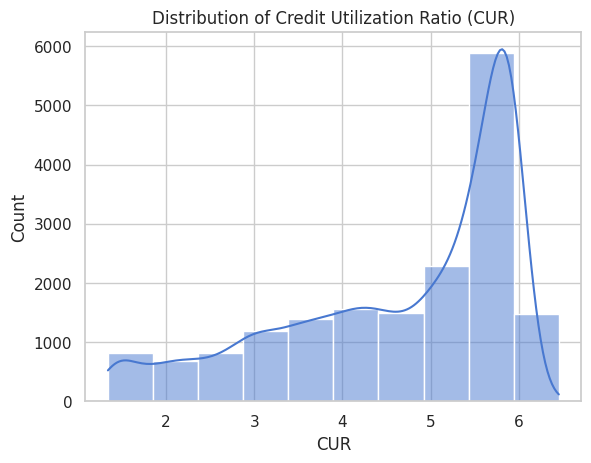

In [91]:
X_train['CUR'] = X_train[Bill_cols].sum(axis=1) / X_train['LIMIT_BAL']
sns.histplot(X_train['CUR'], bins=10, kde=True)
plt.title('Distribution of Credit Utilization Ratio (CUR)')
plt.xlabel('CUR')
plt.ylabel('Count')
plt.show()


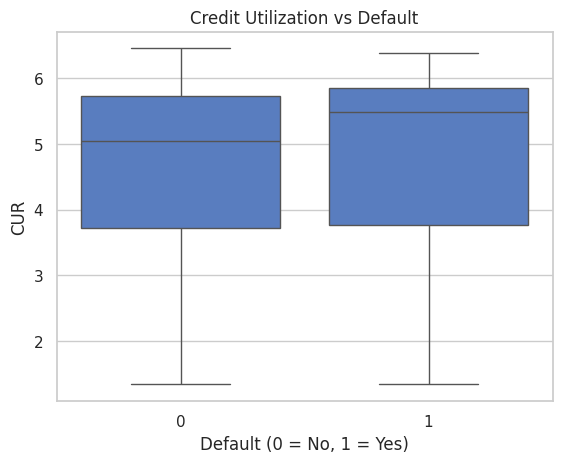

In [92]:
X_train_plot['CUR'] = X_train_plot[Bill_cols].sum(axis=1) / X_train_plot['LIMIT_BAL']
sns.boxplot(x='next_month_default', y='CUR', data=X_train_plot)
plt.title('Credit Utilization vs Default')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('CUR')
plt.show()

In [93]:
X_train['CUR'].describe()

,CUR
count,17584.000000
mean,4.638476
std,1.320149
min,1.339219
25%,3.727611
50%,5.138877
75%,5.761267
max,6.455950


In [94]:
# Create percentiles for CUR
low_thresh = X_train['CUR'].quantile(0.33)
med_thresh = X_train['CUR'].quantile(0.66)

def cur_category_dynamic(x):
    if x <= low_thresh:
        return 0  #'Low'
    elif x <= med_thresh:
        return 1  #'Medium'
    else:
        return 2  #'High'

X_train['CUR'] = X_train['CUR'].apply(cur_category_dynamic)
print(X_train['CUR'].value_counts())

CUR
2    5979
0    5803
1    5802
Name: count, dtype: int64


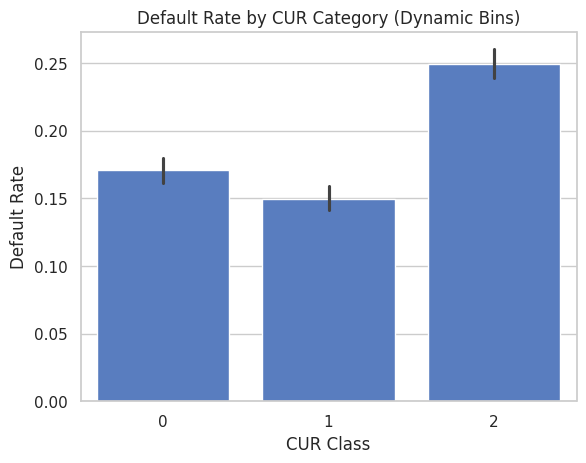

In [95]:
X_train_plot['CUR'] = X_train_plot['CUR'].apply(cur_category_dynamic)
sns.barplot(x='CUR', y='next_month_default', data=X_train_plot, estimator=np.mean)
plt.title('Default Rate by CUR Category (Dynamic Bins)')
plt.ylabel('Default Rate')
plt.xlabel('CUR Class')
plt.show()


***Credit Utilization Ratio*** (CUR) is a crucial financial metric that measures how much of a customer's total available credit is currently being used.High utilization may indicate financial stress or over-reliance on credit, both of which can be early warning signs of default risk.


*   Histogram and Kde shows that the distribution is right-skewed, with a large number of customers having a CUR between 5.0 and 6.0. Very few customers have CUR below 3.0 which may require closer monitoring for risk exposure.
*    In box plot,while both defaulters and non-defaulters have high CUR values, the median CUR of defaulters appears slightly higher.
*   The barplot shows that the default rate is highest in the 'High' CUR class, followed by 'Low', and is lowest in the 'Medium' CUR group so moderate credit usage might be a sign of financially stable behavior.




<ipython-input-96-4e96d299ec94>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='trend_bin', y='next_month_default', data=X_train_plot, estimator=np.mean, palette='viridis')


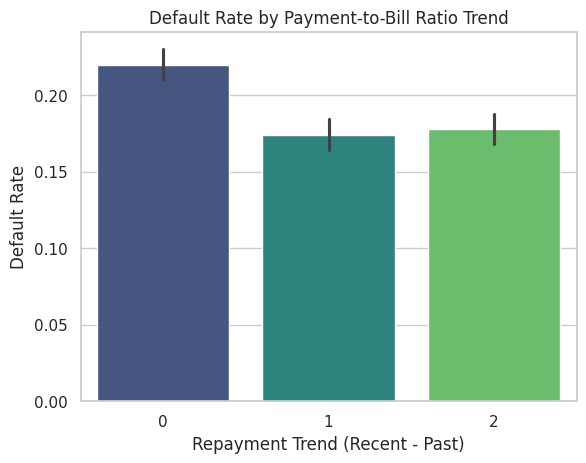

In [96]:
X_train['payment_bill_ratio'] = (X_train['pay_amt6'] / (X_train['Bill_amt6'] + 1e-6)) - (X_train['pay_amt1'] / (X_train['Bill_amt1'] + 1e-6))
X_train_plot['payment_bill_ratio'] = (X_train_plot['pay_amt6'] / (X_train_plot['Bill_amt6'] + 1e-6)) - (X_train_plot['pay_amt1'] / (X_train_plot['Bill_amt1'] + 1e-6))

X_train_plot['trend_bin'] = pd.qcut(X_train['payment_bill_ratio'], q=3, labels=[0, 1, 2])

sns.barplot(x='trend_bin', y='next_month_default', data=X_train_plot, estimator=np.mean, palette='viridis')
plt.title('Default Rate by Payment-to-Bill Ratio Trend')
plt.xlabel('Repayment Trend (Recent - Past)')
plt.ylabel('Default Rate')
plt.show()

***Payment-to-Bill Ratio*** Trend captures how a customer's recent repayment amount compares to their historical repayment behavior.
*   The bar plot shows thet customers with a low repayment trend (declining payments) show the highest default rate.



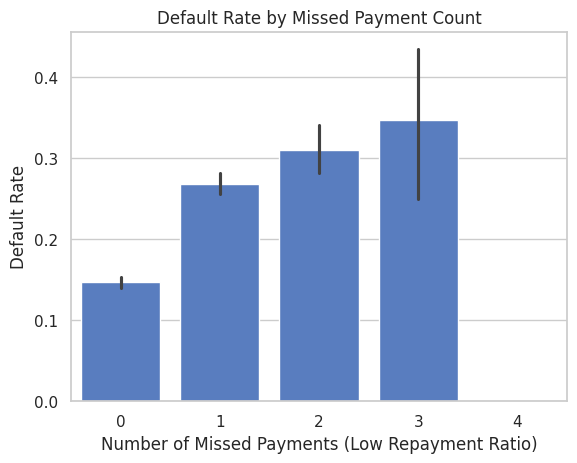

In [97]:
def missed_payments(row):
    return sum((row[f'pay_amt{m}'] / (row[f'Bill_amt{m}'] + 1e-6)) < 0.2 for m in range(1, 7))

X_train['missed_payment_count'] = X_train.apply(missed_payments, axis=1)
X_train_plot['missed_payment_count'] = X_train_plot.apply(missed_payments, axis=1)

# Plot
sns.barplot(x='missed_payment_count', y='next_month_default', data=X_train_plot, estimator=np.mean)
plt.title('Default Rate by Missed Payment Count')
plt.xlabel('Number of Missed Payments (Low Repayment Ratio)')
plt.ylabel('Default Rate')
plt.show()

***Missed Payment Count*** is a feature which tracks the number of months a customer repaid less than 20% of their billed amount over the past 6 months.

*   The plot reveals a clear upward trend in default rates as the number of missed payments increases. Customers with zero missed payments show the lowest risk, with a default rate around 15%, and it climbs past 30% with two or more missed months



In [98]:
X_train['repayment_coverage'] = X_train[pay_cols].sum(axis=1) / (X_train[Bill_cols].sum(axis=1) + 1e-6)
X_train_plot['repayment_coverage'] = X_train_plot[pay_cols].sum(axis=1) / (X_train_plot[Bill_cols].sum(axis=1) + 1e-6)

low_rcr = X_train_plot['repayment_coverage'].quantile(0.33)
med_rcr = X_train_plot['repayment_coverage'].quantile(0.66)

def categorize_rcr(x):
    if x <= low_rcr:
        return 0  #'Low'
    elif x <= med_rcr:
        return 1  #'Medium'
    else:
        return 2  #'High'

X_train_plot['repayment_coverage'] = X_train_plot['repayment_coverage'].apply(categorize_rcr)


<ipython-input-99-0910e8ab006e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='repayment_coverage', y='next_month_default', data=X_train_plot, estimator=np.mean, palette='Blues')


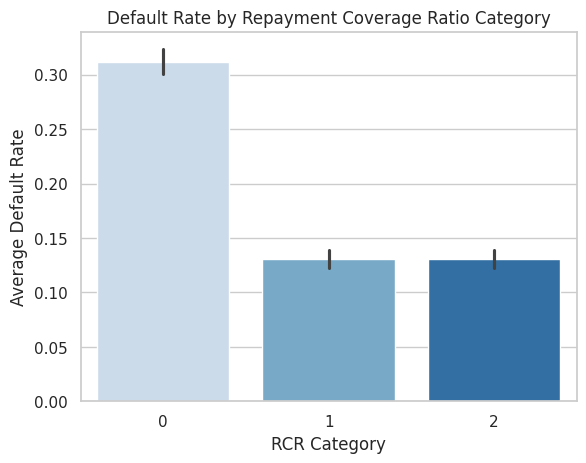

In [99]:
sns.barplot(x='repayment_coverage', y='next_month_default', data=X_train_plot, estimator=np.mean, palette='Blues')
plt.title('Default Rate by Repayment Coverage Ratio Category')
plt.xlabel('RCR Category')
plt.ylabel('Average Default Rate')
plt.show()


The ***Repayment Coverage Ratio*** represents how well a customer’s repayment amount covers their total billed amount.

*  The graph shows a clear inverse relationship between RCR and default rates. Customers in category 0 (low repayment coverage) have the highest average default rate, exceeding 30%.




In [100]:
print(pd.DataFrame(X_train).isnull().sum())

marriage                    0
sex                         0
education                   0
age                         0
pay_0                       0
pay_2                       0
pay_3                       0
pay_4                       0
pay_5                       0
pay_6                       0
AVG_Bill_amt                0
PAY_TO_BILL_ratio           0
LIMIT_BAL                   0
Bill_amt1                   0
Bill_amt2                   0
Bill_amt3                   0
Bill_amt4                   0
Bill_amt5                   0
Bill_amt6                   0
pay_amt1                    0
pay_amt2                    0
pay_amt3                    0
pay_amt4                    0
pay_amt5                    0
pay_amt6                    0
repayment_trend             0
back_to_back_delinquency    0
CUR                         0
payment_bill_ratio          0
missed_payment_count        0
repayment_coverage          0
dtype: int64


In [101]:
#Creating same features on test and validate dataset
def create_features(df):
    df = df.copy()
    df['repayment_trend'] = df[['pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].mean(axis=1) - df['pay_0']
    df['back_to_back_delinquency'] = df[pay_cols].apply(back_to_back_delinquency, axis=1)
    df['CUR'] = df[Bill_cols].sum(axis=1) / df['LIMIT_BAL']
    df['payment_bill_ratio'] = (df['pay_amt6'] / (df['Bill_amt6'] + 1e-6)) - (df['pay_amt1'] / (df['Bill_amt1'] + 1e-6))
    df['repayment_coverage'] = df[pay_cols].sum(axis=1) / (df[Bill_cols].sum(axis=1) + 1e-6)
    df['missed_payment_count'] = df.apply(missed_payments, axis=1)

    return df

In [102]:
X_test = create_features(X_test)

In [103]:
print(pd.DataFrame(X_test).isnull().sum())

marriage                    0
sex                         0
education                   0
age                         0
pay_0                       0
pay_2                       0
pay_3                       0
pay_4                       0
pay_5                       0
pay_6                       0
AVG_Bill_amt                0
PAY_TO_BILL_ratio           0
LIMIT_BAL                   0
Bill_amt1                   0
Bill_amt2                   0
Bill_amt3                   0
Bill_amt4                   0
Bill_amt5                   0
Bill_amt6                   0
pay_amt1                    0
pay_amt2                    0
pay_amt3                    0
pay_amt4                    0
pay_amt5                    0
pay_amt6                    0
repayment_trend             0
back_to_back_delinquency    0
CUR                         0
payment_bill_ratio          0
repayment_coverage          0
missed_payment_count        0
dtype: int64


In [104]:
scaler = StandardScaler()
X_test = X_test[X_train.columns]
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
df['next_month_default'].value_counts(normalize=True)

,proportion
next_month_default,
0,0.809562
1,0.190438


There is a clear class imbalance which can be effectively handled through SMOTE

In [106]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [107]:
from collections import Counter
print(Counter(y_train_bal))

Counter({1: 14235, 0: 14235})


# Model Training

## Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1],
    'solver': ['saga'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': [500,1000]
}

logreg = LogisticRegression()

grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_bal, y_train_bal)
print("Best Parameters from Validation Set:")
print(grid.best_params_)
print("Best F1 Score on Validation:", grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters from Validation Set:
{'C': 0.1, 'l1_ratio': 0.25, 'max_iter': 500, 'penalty': 'elasticnet', 'solver': 'saga'}
Best F1 Score on Validation: 0.6847299637497091


In [110]:
pd.Series(grid.best_estimator_.coef_[0], index=X_train.columns).sort_values()

,0
Bill_amt1,-0.341810
pay_amt2,-0.265679
LIMIT_BAL,-0.166567
pay_amt1,-0.159766
pay_amt3,-0.154650
marriage,-0.128524
Bill_amt4,-0.121109
pay_amt5,-0.098448
education,-0.088753
pay_amt4,-0.068101


In [111]:
coefs = grid.best_estimator_.coef_[0]
feature_names = X_train.columns

negative_features = feature_names[coefs < 0]
columns_to_keep_indices = [i for i, col in enumerate(feature_names) if col not in negative_features]
X_train_reduced = X_train_bal[:, columns_to_keep_indices]
X_test_reduced = X_test_scaled[:, columns_to_keep_indices]

In [112]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1],
    'solver': ['saga'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': [500,1000]
}

logreg = LogisticRegression()

grid1 = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid1.fit(X_train_reduced, y_train_bal)
print("Best Parameters from Validation Set:")
print(grid1.best_params_)
print("Best F1 Score on Validation:", grid1.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Best Parameters from Validation Set:
{'C': 0.1, 'l1_ratio': 0.25, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Best F1 Score on Validation: 0.6718844317904094


### Even after removing insignificant features, the F1 score is quite low,which seems because logistic regression is a linear model.

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train_bal, y_train_bal)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("\nTuned Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}

Tuned Model Accuracy: 0.8057582592543452

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      6102
           1       0.49      0.49      0.49      1435

    accuracy                           0.81      7537
   macro avg       0.68      0.68      0.68      7537
weighted avg       0.81      0.81      0.81      7537


Confusion Matrix:
 [[5374  728]
 [ 736  699]]


In [119]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize XGBoost model
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Setup GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_clf,
                                param_grid=param_grid,
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1,
                                verbose=1)

# Fit the model
grid_search_xgb.fit(X_train_bal, y_train_bal)

# Get the best model
best_xgb = grid_search_xgb.best_estimator_
print("Best Parameters:", grid_search_xgb.best_params_)

# Predict and evaluate
y_pred = best_xgb.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("\nXGBoost Tuned Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:19:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1}

XGBoost Tuned Accuracy: 0.8069523683163062

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      6102
           1       0.49      0.44      0.47      1435

    accuracy                           0.81      7537
   macro avg       0.68      0.67      0.67      7537
weighted avg       0.80      0.81      0.80      7537


Confusion Matrix:
 [[5445  657]
 [ 798  637]]
